In [9]:
import pandas as pd
import texthero as hero

In [7]:
df = pd.read_csv('C:\\Users\\Shakil\\Downloads\\stock market.csv')
df.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.019700e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1.019710e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1.019710e+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1.019720e+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1.019720e+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [8]:
# drop some unnecessary cols

df=df.drop(['url', 'symbols'], axis=1)

In [10]:
df['clean_text'] = hero.clean(df['text'])
df.head(2)

,id,text,timestamp,source,company_names,verified,clean_text
0,1.019700e+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,The Goldman Sachs,True,"video "" office minding business "" -david solom..."
1,1.019710e+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,Macy's,True,price lumber lb f since hitting ytd highs macy...


In [11]:
# Returns a pandas series where each row contains a list of tokens

hero.tokenize(df['clean_text'])

0        [video, ", office, minding, business, ", -, da...
1        [price, lumber, lb, f, since, hitting, ytd, hi...
2        [says, american, dream, dead, https, co, crgx1...
3        [barry, silbert, extremely, optimistic, bitcoi...
4        [satellites, avoid, attacks, space, junk, circ...
                               ...                        
28378                                                   []
28379                                                   []
28380                                                   []
28381                                                   []
28382                                                   []
Name: clean_text, Length: 28383, dtype: object

In [12]:
# Stem function has two stemming algorithm.
# 1. Snowball 2. Porterstemmer

hero.stem(df['clean_text'], stem='snowball')

0        video " offic mind busi " -david solomon tell ...
1        price lumber lb f sinc hit ytd high maci turna...
2              say american dream dead https co crgx19x7sa
3        barri silbert extrem optimist bitcoin predict ...
4        satellit avoid attack space junk circl earth h...
                               ...                        
28378                                                     
28379                                                     
28380                                                     
28381                                                     
28382                                                     
Name: clean_text, Length: 28383, dtype: object

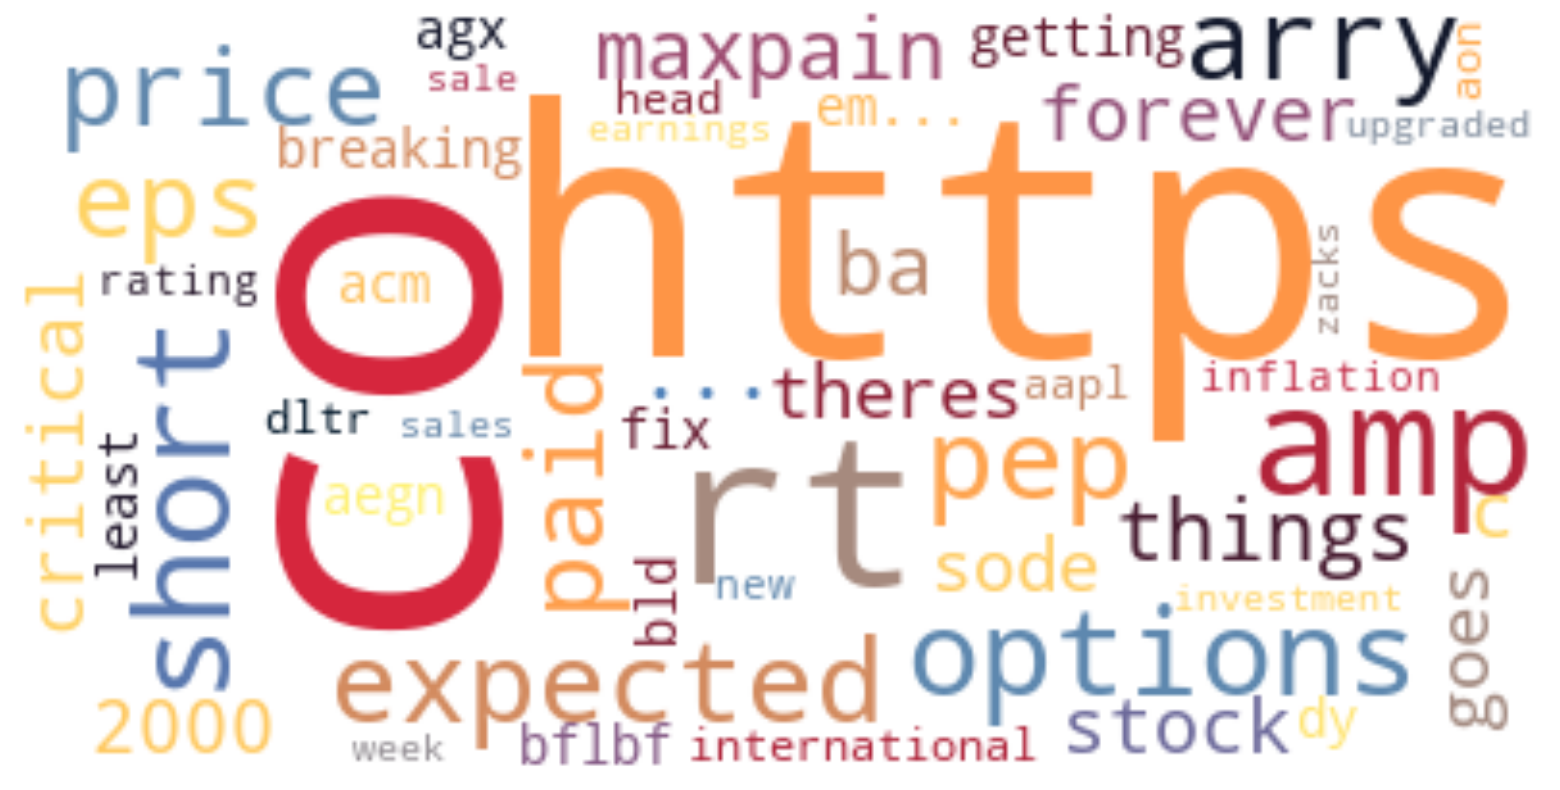

In [18]:
hero.visualization.wordcloud(df['clean_text'], width=400, height=200, background_color='white', max_words=50)

In [20]:
# returns most frequently used words

hero.visualization.top_words(df['clean_text']).head(5)

co       146
https    139
..        34
rt        31
amp       15
Name: clean_text, dtype: int64

In [21]:
# named entities returns a pandas series
# under the list, tuples containing information regarding the given named entities

hero.named_entities(df['clean_text'], package='spacy')

0                              [(solomon, PERSON, 41, 48)]
1                                                       []
2                                [(american, NORP, 5, 13)]
3        [(barry silbert, PERSON, 0, 13), (bitcoin, GPE...
4                                                       []
                               ...                        
28378                                                   []
28379                                                   []
28380                                                   []
28381                                                   []
28382                                                   []
Length: 28383, dtype: object

In [23]:
# noun chunks returns a group of consecutive word that belongs together.

hero.noun_chunks(df['clean_text'])[:10]

0    [(video " office minding business " -david sol...
1    [(ytd highs macy turnaround, NP, 32, 57), (htt...
2    [(american dream dead https co crgx19x7sa, NP,...
3    [(barry silbert, NP, 0, 13), (extremely optimi...
4    [(satellites, NP, 0, 10), (attacks space junk,...
5    [(realmoney david butler favorite fang stock r...
6      [(miss convo one favorite thinkers, NP, 2, 34)]
7    [(u intelligence documents nelson mandela, NP,...
8    [(senate, NP, 0, 6), (emergency alerts, NP, 13...
9         [(hedge fund manager marc larsy, NP, 0, 29)]
dtype: object